# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
#Test code
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

weather_info = {
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Wind Speed': []
}

count = 1

for city in cities:
    
    break
    ''''''''''''''''''''''''''''''''''''''''''''''
    DO NOT BREAK REMOVE UNLESS NEW DATA'S NEEDED!!
    ''''''''''''''''''''''''''''''''''''''''''''''

    response = requests.get(f'{url}appid={weather_api_key}&units={units}&q={city}').json()
    time.sleep(0.5)

    try:

        weather_info['City'].append(response['name'])
        weather_info['Cloudiness'].append(response['clouds']['all'])
        weather_info['Country'].append(response['sys']['country'])
        weather_info['Date'].append(response['dt'])
        weather_info['Humidity'].append(response['main']['humidity'])
        weather_info['Lat'].append(response['coord']['lat'])
        weather_info['Lng'].append(response['coord']['lon'])
        weather_info['Max Temp'].append(response['main']['temp_max'])
        weather_info['Wind Speed'].append(response['wind']['speed'])
        
        print(f'City# {count}, {city} has been found!')

    except KeyError:

        print(f'City# {count}, {city} has not been found, data could not be imported!')

    count += 1

d!
City# 104, buseresere has been found!
City# 105, souillac has been found!
City# 106, livadiya has been found!
City# 107, paka has been found!
City# 108, cuamba has been found!
City# 109, sioux lookout has been found!
City# 110, half moon bay has been found!
City# 111, bida has been found!
City# 112, montrose has been found!
City# 113, lata has been found!
City# 114, ahipara has been found!
City# 115, tilichiki has been found!
City# 116, pisco has been found!
City# 117, victoria has been found!
City# 118, niceville has been found!
City# 119, constitucion has been found!
City# 120, la rioja has been found!
City# 121, beloha has been found!
City# 122, grand forks has been found!
City# 123, rocha has been found!
City# 124, isangel has been found!
City# 125, mys shmidta has not been found, data could not be imported!
City# 126, leningradskiy has been found!
City# 127, arman has been found!
City# 128, saint-philippe has been found!
City# 129, kurilsk has been found!
City# 130, gumdag has 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
weather_df = pd.DataFrame(weather_info)
weather_df.to_csv('../output_data/cities.csv', index = False)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vao,25,NC,1579890052,81,-22.67,167.48,76.73,19.89
1,Bredasdorp,0,ZA,1579890243,77,-34.53,20.04,70.00,10.11
2,Calvia,44,ES,1579890243,81,39.57,2.51,55.99,3.36
3,Jalingo,30,NG,1579890244,10,8.88,11.37,75.99,7.78
4,Tavricheskoye,75,RU,1579890244,92,54.59,73.64,30.20,8.95
...,...,...,...,...,...,...,...,...,...
575,Sittwe,100,MM,1579890589,45,20.15,92.90,68.86,15.73
576,Wairoa,0,NZ,1579890589,85,-39.03,177.37,61.27,2.93
577,Marshall,40,US,1579890590,71,34.38,-86.33,54.00,5.82
578,Port Lincoln,0,AU,1579890591,83,-34.73,135.87,60.98,6.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

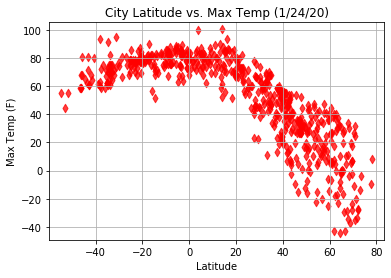

In [80]:
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.title('City Latitude vs. Max Temp (1/24/20)')
plt.grid()
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

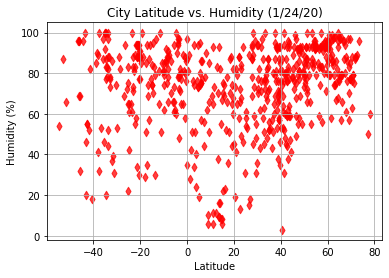

In [81]:
x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.title('City Latitude vs. Humidity (1/24/20)')
plt.grid()
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

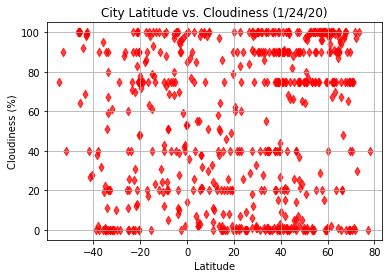

In [82]:
x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.title('City Latitude vs. Cloudiness (1/24/20)')
plt.grid()
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

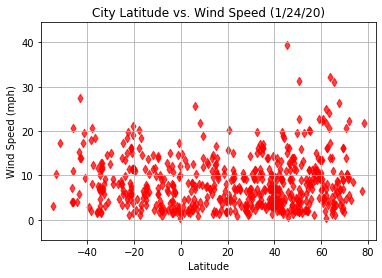

In [83]:
x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.title('City Latitude vs. Wind Speed (1/24/20)')
plt.grid()
plt.show

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


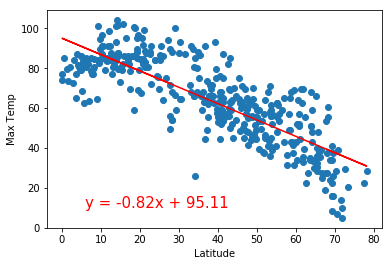

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


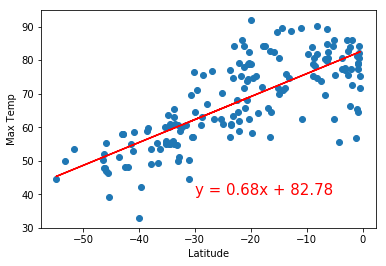

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


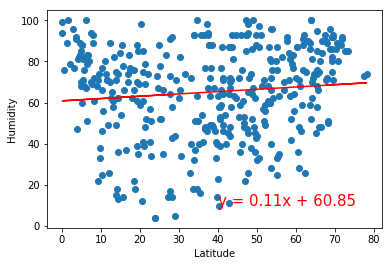

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


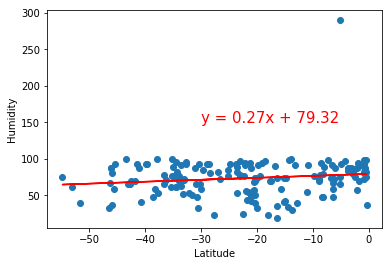

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


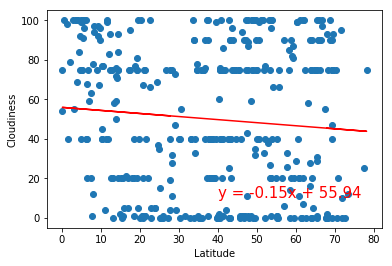

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


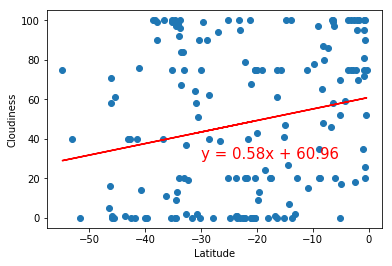

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


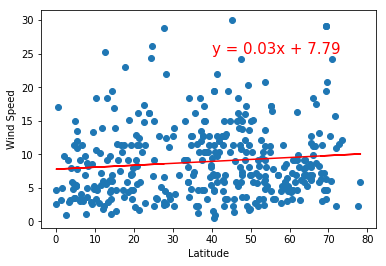

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


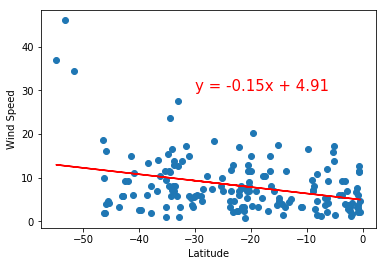